[1.25, 1.4, 1.85, 2.0, 0.5, 1.55, 0.8, 1.1, 0.95, 1.7, 0.65, 0.728] [-2.898383145882512, -2.7252269754330642, -1.9653673171365076, -1.8439442183557895, -4.035450322367902, -2.5204118679504113, -3.621807347719575, -3.1576058558077658, -3.3264976713045082, -2.3376453009397005, -3.8227974716104676, -3.703489752480005]


TypeError: 'float' object is not iterable

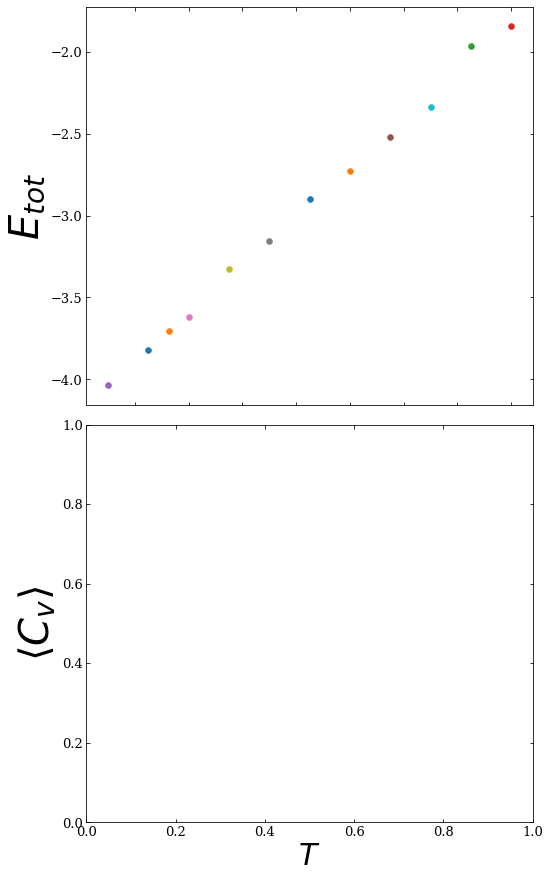

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches
import numpy.polynomial.polynomial as poly



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel(r'$E_{tot}$',fontsize=40)
ax2.set_ylabel(r'$\left \langle C _{v} \right \rangle$',fontsize=40)
ax2.set_xlabel(r'$T$',fontsize=30)

appendT = []
appendE = []


folder_path = '/home/pedro/Desktop/Fisica-Computacional-master/MD/corridas/Data/'
for filename in glob.glob(os.path.join(folder_path,'Etot'+'_'+'*.dat')):
    filenameT=filename.split('=')[3]
    filenameT=filenameT.split('.d')[0]
    Tint=float(filenameT)
    data = pd.read_table(filename, header=None, sep="\s+")
    data = data[data.iloc[:,0].between(0.499, 99.9,inclusive=True)]        #appended_data.append(data)

    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    Emean=np.mean(Mag)
    
    appendT.append(Tint)
    appendE.append(Emean)

    ax1.scatter(Tint, Emean, linewidth=0.5,label=r'T = %.3f' %(Tint))

    
cond = (appendT>min(appendT)) & (appendT<max(appendT))
xFit = appendT[ cond ]
yFit = appendE[ cond ]

x_new = np.linspace(min(xFit),1.1, num=len(xFit)*10)
coefs = poly.polyfit(xFit,yFit , 1)
ffit = poly.polyval(x_new, coefs)
axes = plt.gca()
ax1.plot(x_new,ffit, linewidth=1,color='k', label=r'$C_{v} = %.2f$' %(coefs[1]))

    
            
folder_path = '/home/pedro/Desktop/Fisica-Computacional-master/MD/corridas/Data/'
for filename in glob.glob(os.path.join(folder_path,'Etot'+'_'+'*.dat')):
    filenameT=filename.split('=')[3]
    filenameT=filenameT.split('.d')[0]
    Tint=float(filenameT)
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    dataDMO = dataDMO[dataDMO.iloc[:,0].between(0.499, 99.9,inclusive=True)]        #appended_data.append(data)
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]
    ECv=np.std(En)

    x=ken
    y=En
    ax2.scatter(Tint, ECv, linewidth=1.,label=r'T = %.3f' %(Tint))
    

        
ax1.legend(fontsize=10.)
ax2.legend(fontsize=10.)



plt.savefig('/home/pedro/Desktop/Fisica-Computacional-master/MD/Cv.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication



